In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

In [73]:
# 5.1 Line Plot

# A. Make a dataframe called foot using the "./international_football_results.csv" file
#    Perform a few exploratory data analysis operations before working with the data set

foot = pd.read_csv("/Users/elimatthewordonez/Dropbox/OTHERS/Data Analytics Training/GA Data Analytics Course/Bootcamp Notes/WEEK 8/8:5 Thursday/6.10 Data Visualisation with Pandas/international_football_results.csv", encoding="latin1")

# We'll use the .to_datetime method and .dt.year property to set the "year" column from a string to an integer

foot['year'] = pd.to_datetime(foot['date']).dt.year

In [74]:
# This prints out the table
foot
# Remember that .head() gives you the first five entries
# If you want to display more than five, just key them into the parantheses.
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [75]:
# .shape gives you the number of rows and columns in the table.
foot.shape

(39669, 10)

In [76]:
# This prints the datatype of the data inside column 'date'.
print(foot['date'].dtype)

object


In [77]:
# Now THIS is different. 
# It's telling you the type of the COLUMN 'date'.
# It won't tell you the type of data INSIDE the column.
type(foot['date'])

pandas.core.series.Series

In [78]:
# Now that we know the datatype in the column 'date' isn't actually datetime, let's convert that data to datetime using the .to_datetime() method.
foot['date'] = pd.to_datetime(foot['date'], errors='coerce')
foot

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
...,...,...,...,...,...,...,...,...,...,...
39664,2018-07-06,Uruguay,France,0,2,FIFA World Cup,Nizhny Novgorod,Russia,True,2018
39665,2018-07-06,Brazil,Belgium,1,2,FIFA World Cup,Kazan,Russia,True,2018
39666,2018-07-07,Sweden,England,0,2,FIFA World Cup,Samara,Russia,True,2018
39667,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,2018


In [79]:
# Let's check the 'date' column to make sure it has changed.
print(foot['date'].dtype)

datetime64[ns]


In [80]:
# Now, we'll use the .to_datetime method and .dt.year property to set the year column from string to integer.
# 'year' is a new column added in this way
foot['year'] = pd.to_datetime(foot['date']).dt.year
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [81]:
# Again, let's check the 'year' column to ensure it is now in int type.
print(foot['year'].dtype)

int32


In [82]:
# B. Let's chart how many games occured in each year:

# First of all, let's look at the data we're going to plot

foot['year'].value_counts()

year
2008    1087
2011    1077
2004    1059
2000    1022
2001    1014
        ... 
1878       2
1874       1
1873       1
1875       1
1872       1
Name: count, Length: 147, dtype: int64

In [83]:
# The years are out of order! 
# This is just because the .value_count is arranging by no. of rows.
# Fortunately, we can sort our column by its index (in this case, 'year') with sort_index()
foot['year'].value_counts().sort_index()

year
1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2014     857
2015    1001
2016     918
2017     908
2018     390
Name: count, Length: 147, dtype: int64

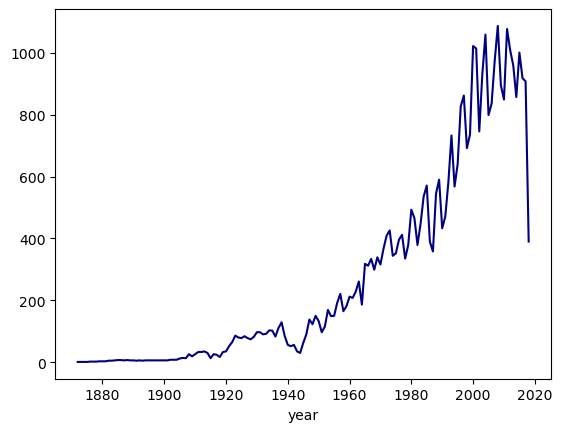

In [110]:
# Finally, we're ready to plot the change over time with .plot()
foot['year'].value_counts().sort_index().plot(color="navy")
# The code above doesn't show the graph for some reason... so:
plt.show()

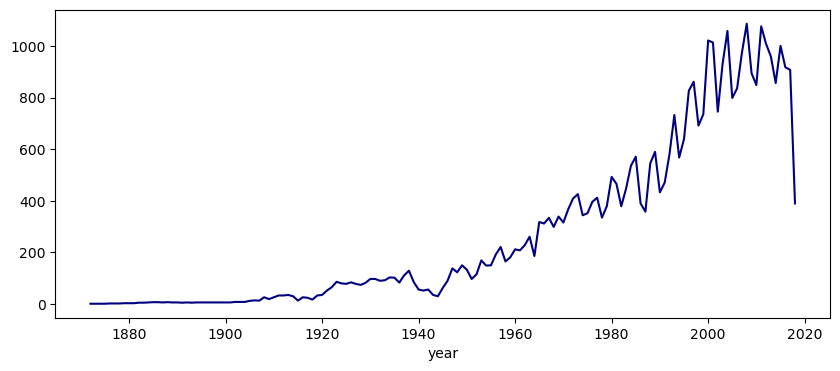

In [116]:
# We can make the graph wider and shorter using the attribute figsize inside .plot()
# (10,4) where 10 = width and 4 = height
foot['year'].value_counts().sort_index().plot(figsize=(10,4),color="navy")
plt.show()

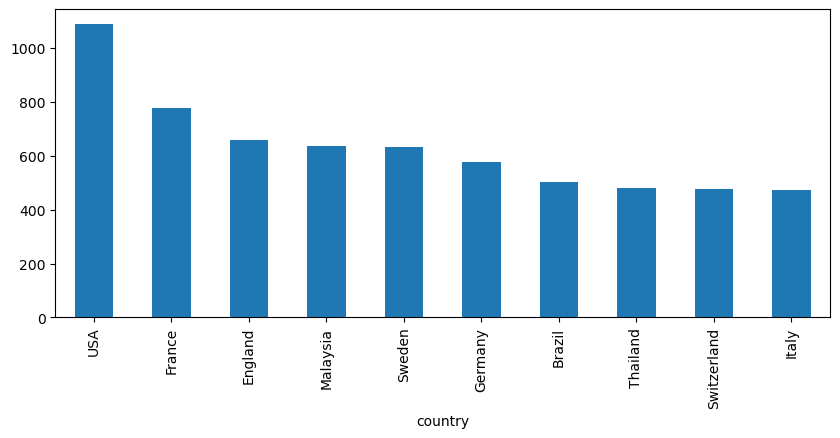

In [122]:
# 5.2 Bar Charts
# A. Let's see how many games each country played, represented as a bar chart
foot['country'].value_counts().head(10).plot(kind="bar",figsize=(10,4))
plt.show()

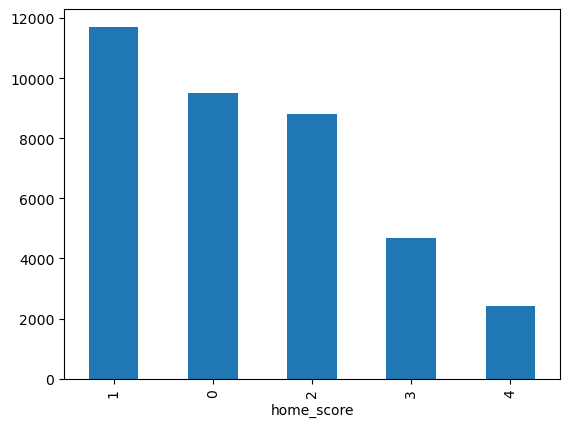

In [136]:
# B. Now let's plot the occurence of specific scores for the home team
# foot.loc[foot['home_score']].value_counts().head(10).plot(kind = 'bar')
foot['home_score'].value_counts().head().plot(kind="bar")
plt.show()

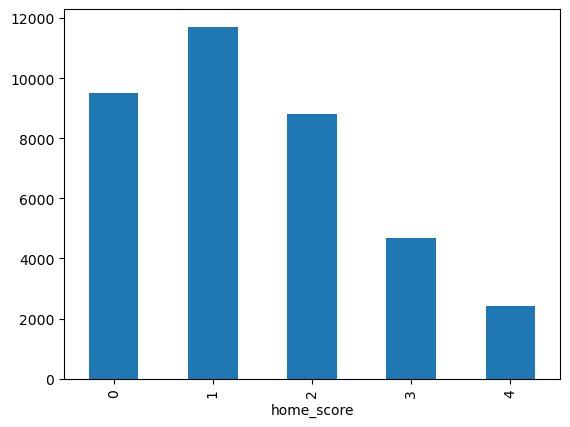

In [140]:
# C. Instead of sorting from highest to lowest value, let's sort the x axis in ascending order
foot['home_score'].value_counts().sort_index().head().plot(kind="bar")
plt.show()

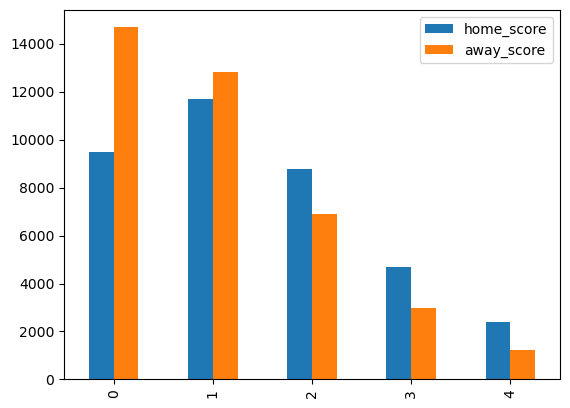

In [152]:
# BONUS: Compare the home_score and away_score value counts to analyze home field advantage
# You will need to use the .apply method to use value_counts on each column of a dataframe
foot[['home_score', 'away_score']].apply(pd.Series.value_counts).head().plot(kind="bar")
plt.show()

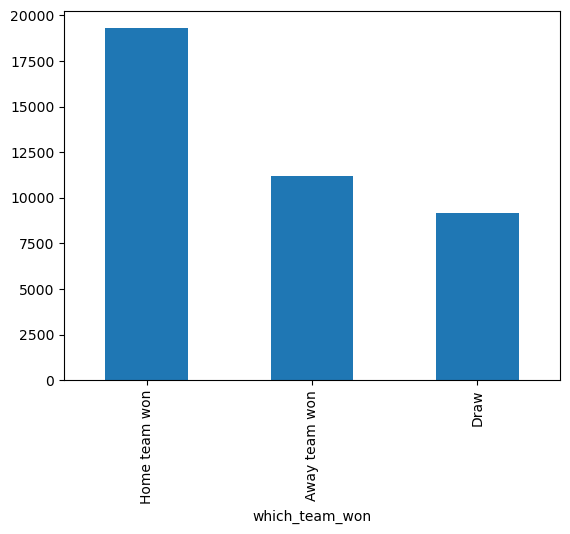

In [184]:
# Now let's analyse home field advantage. What does that mean?
# It means we want to analyse the degree to which the home team has an advantage over the away team
# Because home team is our focus, maybe let's make a column that records whether the home team won.

# First, let's find the difference between 'home_score' and 'away_score':
def final_score(df):
    return df['home_score']-df['away_score']
# In this calculation, if final_score > 0, home team has won. If final_score < 0, away team has won. 

# Next, let's create a column with this new data:
foot['final_score'] = foot.apply(final_score, axis=1)
# PLEASE READ THIS NOTE: The reason why your code didn't work initially is because you put your axis=0.
# This didn't work because axis=0 meant that you wanted the function to apply FOR EACH COLUMN, instead of each row.
# It doesn't make sense to define a column, only to make the definition apply a function to every row.
# You were basically asking it to do conflicting things. Define a column vs. Apply the function to every column.
# LESSON LEARNED: If you want to create a column and fill it with input based on a function being applied for every row, REMEMBER TO USE axis=1.

# NOTE: Why didn't we need to put in the name of our dataframe in our "final_score" function?
# BECAUSE the main attribute in the .apply function, "func", simply asks you to call the function without input.
# The function will know which df to apply to because .apply is already applied to the df FOOT.

# The next thing we want to do is to define a function which will assign a label to the row stating whether the "home team won", "away team won" or "draw".
def which_team_won(df):
    if df['final_score'] > 0:
        return "Home team won"
    elif df['final_score'] < 0:
        return "Away team won"
    else:
        return "Draw"

# Now, we want to create a new column that stores these values
foot['which_team_won'] = foot.apply(which_team_won,axis=1)

# Now that a column has been created, let's plot a bar chart with the 
foot['which_team_won'].value_counts().plot(kind="bar")
plt.show()

In [190]:
# 5.3 Histograms
# A. Let's start with a new dataset. Create a dataframe called choc from the './chocolate_ratings.csv' file
#    Inspect the data using some exploratory data analysis methods

# First, let's give the data a name.
choc = pd.read_csv('/Users/elimatthewordonez/Dropbox/OTHERS/Data Analytics Training/GA Data Analytics Course/Bootcamp Notes/WEEK 8/8:5 Thursday/6.10 Data Visualisation with Pandas/chocolate_ratings.csv', encoding='latin1')
# Now, let's look at what columns it has.
choc.columns
# Now let's craete a dataframe out of the datatypes of each column.
# .DataFrame(data, index(row label), columns(column label), dtype(set data type))
pd.DataFrame(choc.dtypes, columns=["DataType"])

,DataType
CompanyÂ \n(Maker-if known),object
Specific Bean Origin\nor Bar Name,object
REF,int64
Review\nDate,int64
Cocoa\nPercent,object
Company\nLocation,object
Rating,float64
Bean\nType,object
Broad Bean\nOrigin,object


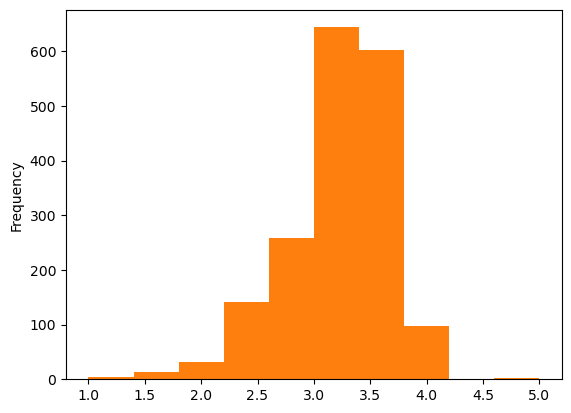

In [194]:
# B. Now, let's explore the distribution of ratings
#    i. Start by plotting the Rating column in a histogram
choc['Rating'].plot(kind="hist")
plt.show()

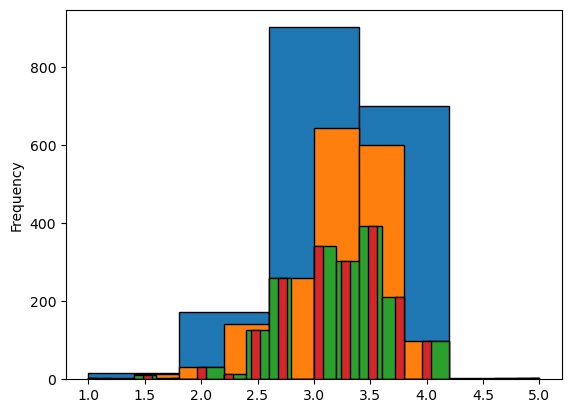

In [210]:
#    ii. Looking good! Let's see how granular we can get
#        Modify the number of bins to change how ranges are distributed

# "edgecolor" (note american spelling) is a special attribute for plotting histograms.
# It makes the graphs easier to see!
choc['Rating'].plot(kind="hist", bins=5,edgecolor="black")
choc['Rating'].plot(kind="hist", bins=10,edgecolor="black")
choc['Rating'].plot(kind="hist", bins=20,edgecolor="black")
choc['Rating'].plot(kind="hist", bins=50,edgecolor="black")
plt.show()

# Here's where I learned that if you plot different graphs consecutively before showing, all the graphs you coded will show on the SAME GRAPH.
# Also, the graph created is really ugly. Let's just choose ONE graph, with 10 bins.

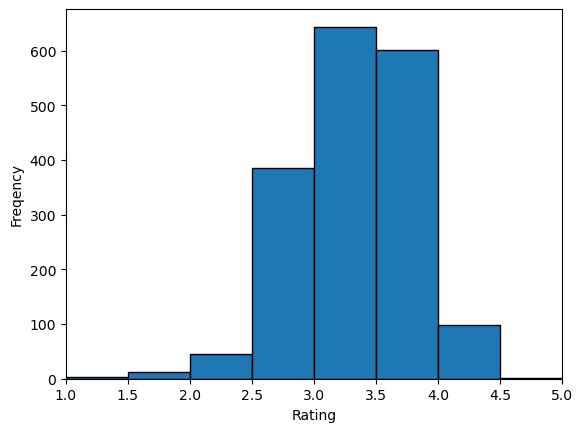

In [230]:
#    iii. Now, let's add some descriptive labels to our chart using matplotlib

# First, let's limit the x-axis range to between 1.0 and 5.0.
# Let's also define the bins more specifically in list form.
choc['Rating'].plot(kind="hist", xlim=(1.0,5.0),bins=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],edgecolor="black")
plt.xlabel('Rating')
plt.ylabel('Freqency')
plt.show()

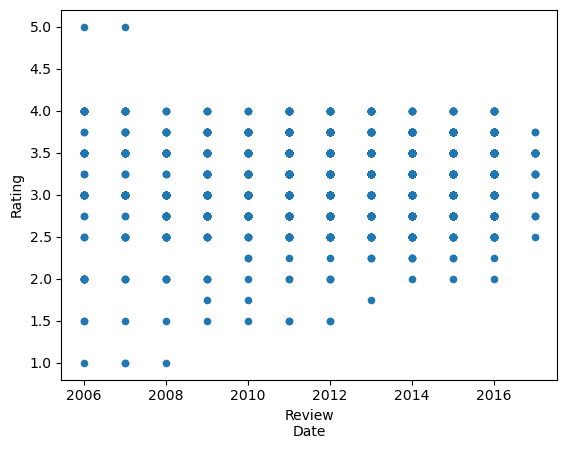

In [236]:
# 5.4 Scatter Plots
# A. Is there a connection between Review Date and Rating? Plot them with a scatter plot
choc.plot(kind="scatter", x="Review\nDate", y="Rating" )
plt.show()
# Why is this graph not so helpful?
# Because rating is not a continuous variable

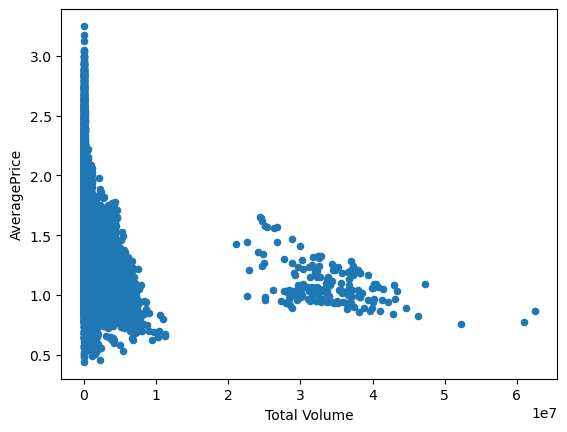

In [242]:
# B. Create a dataframe called avo from './avocado.csv'.  Explore this new dataframe, then scatter plot correlation between Total Volume and AveragePrice
avo = pd.read_csv('/Users/elimatthewordonez/Dropbox/OTHERS/Data Analytics Training/GA Data Analytics Course/Bootcamp Notes/WEEK 8/8:5 Thursday/6.10 Data Visualisation with Pandas/avocado.csv', encoding='latin1')
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice')
plt.show()

In [ ]:
# 5.5 Visualizations to Hypotheses
# Create visualizations around any of the above datasets or our superstore datasets
# For at least one of the visualizations, attach a hypothesis or specific claim the chart supports